In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import platform

from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
from scipy.stats import *
from sklearn.preprocessing import *
from scipy import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('../sources/Data/house_data/train.csv')
df_train.columns[:10]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities'],
      dtype='object')

In [3]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# SalePrice 항목에 대한 탐색적 분석을 해 주세요.

# 정답 ↓
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
var = 'GrLivArea' # 지역이름

## ** concat
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1) # axis = 1: 열단위로 결합
data2 = pd.concat([df_train['SalePrice'], df_train[var]], axis=0) # axis = 0: 행단위로 결합


data.head(2)

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262


In [6]:
data2.head(2)

0    208500
1    181500
dtype: int64

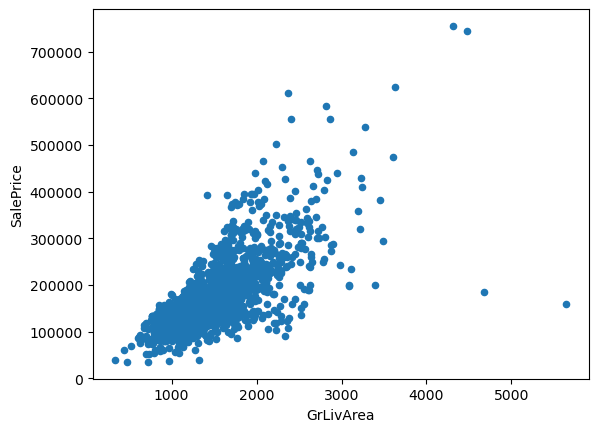

In [7]:
data.plot.scatter(x=var, y='SalePrice')
# 옵션: xlim=(0, 7000), ylim=(0, 900000))
plt.show()

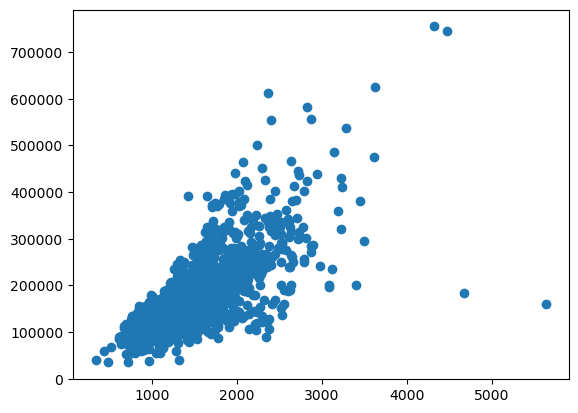

In [8]:
plt.scatter(df_train[var], df_train['SalePrice'])
plt.show()

In [9]:
# df_train['SalePrice'].boxplot()
# ***** Series는 박스플롯 불가능 *****

plt.show()

AttributeError: 'Series' object has no attribute 'boxplot'

## 판다스
1) 1차원 시리즈 : 행단위만 존재 ->2차원 차트 XX
2) 2차원 데이터프레임 : 차트 같이 행렬이 존재
-> 그래서 위의 data를 concat을 통해 Series 두개를 합침.

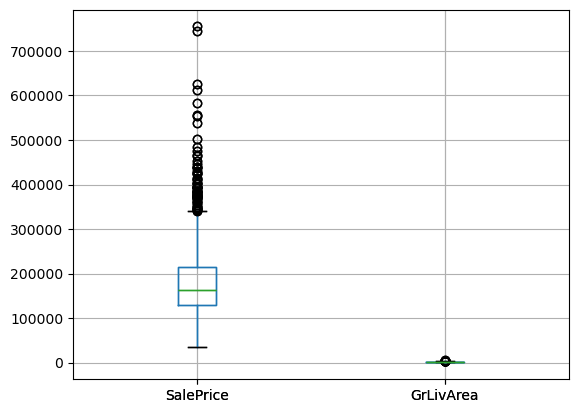

In [11]:
data.boxplot()
plt.show()

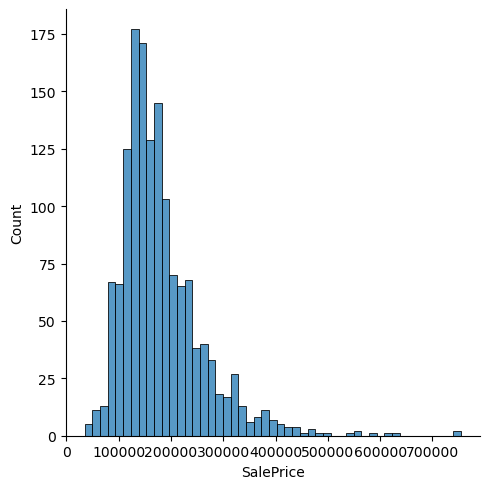

In [14]:
sns.displot(df_train['SalePrice'])
plt.show()

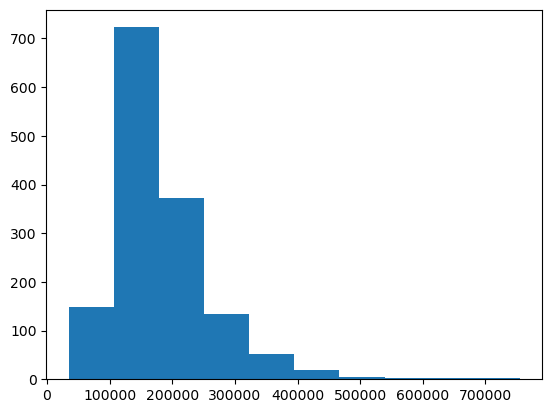

In [13]:
plt.hist(df_train['SalePrice'])
plt.show()

---

* data.plot.scatter() == plt.scatter

* plt.hist() == sns.displot()

---

           SalePrice  GrLivArea
SalePrice   1.000000   0.708624
GrLivArea   0.708624   1.000000


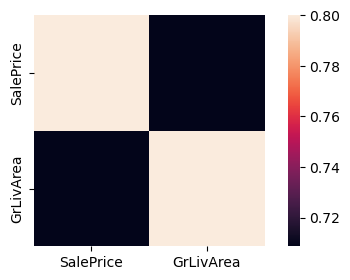

In [23]:
corrmat = data.corr() ## df_train은 문자임, 즉 문자는 상관관계 계산 불가
# -> 2차원 데이터 프레임이 필요
f, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(corrmat, vmax=.8, square=True)
print(corrmat)
plt.show()

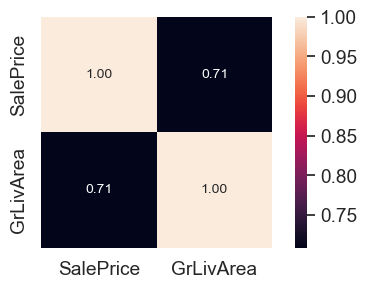

In [25]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(6, 3))

hm = sns.heatmap(cm, cbar=True, annot=True,
                 square=True, fmt='.2f', annot_kws={'size':10},
                 yticklabels=cols.values, xticklabels=cols.values)

plt.show()

## 결측치 (Missing Value)

- NaN: 측정되지 않았거나 존재하지 않는 값
- 숫자 `0`이나 단순 공백과는 다름
- 메모리 공간을 차지하면서 값은 없는 상태
- 데이터 전처리 단계에서 반드시 처리해야 함

---

## 결측치 처리 방법

1. 삭제 (Remove)
   - 결측치가 포함된 행(row)이나 열(column) 제거
   - 데이터가 충분히 많고 결측치 비율이 낮을 때 사용

2. 대체 (Imputation)
   - 다른 값으로 결측치 채우기
   - 평균, 중앙값, 최빈값, 특정 상수, 이전/이후 값 등으로 대체 가능

3. 모델 활용 (Machine Learning)
   - 머신러닝 알고리즘에 결측치를 직접 처리하도록 넘김
   - 예: 트리 기반 모델은 일부 결측치를 자동으로 처리 가능

4. 수동 계산 (Manual Handling)
   - 도메인 지식 기반으로 사람이 직접 값 추정/계산
   - 예: 센서 오류일 경우 전문가 판단으로 적절한 값 보정

---

In [30]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260


In [38]:
# 결측치 처리
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, axis=1, errors='ignore')
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index, axis=0, errors='ignore')
df_train.isnull().sum().max()

0

# SalePrice 스케일링 후 이상치 탐색
salepice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis]);

low_range  = salepice_scaled[salepice_scaled[:, 0].argsort()][:10]
high_range = salepice_scaled[salepice_scaled[:, 0].argsort()][-10:]

print('outer range (low) of the distribution:')
print(low_range)

print('\nouter range (high) of the distribution:')
print(high_range)

In [40]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
